In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Generate at least 2 new features using existing features of your choice
# bmi_category Feature
df['bmi_category'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['underweight', 'normal weight', 'overweight', 'obese'], include_lowest=True)

# Age_group Feature
age_bins = [0, 30, 60, float('inf')]
age_labels = ['young', 'middle-aged', 'elderly']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)


In [6]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,obese,elderly
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN,elderly
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,obese,elderly
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,obese,middle-aged
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,normal weight,elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,NaN,elderly
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,obese,elderly
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,obese,middle-aged
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,overweight,middle-aged


Total records, Null count,Mean, median, std-dev for each numerical column

In [7]:
print('Total values',len(df))
df.isnull().sum()

Total values 5110


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
bmi_category         201
age_group              0
dtype: int64

In [12]:
df['age'].mean()

43.226614481409

In [9]:
df['age'].median()

45.0

In [13]:
df['bmi'].mean()

28.893236911794666

In [14]:
df['bmi'].median()

28.1

In [16]:
df['avg_glucose_level'].mean()

106.1476771037182

In [17]:
df['avg_glucose_level'].median()

91.88499999999999

<Axes: xlabel='smoking_status', ylabel='count'>

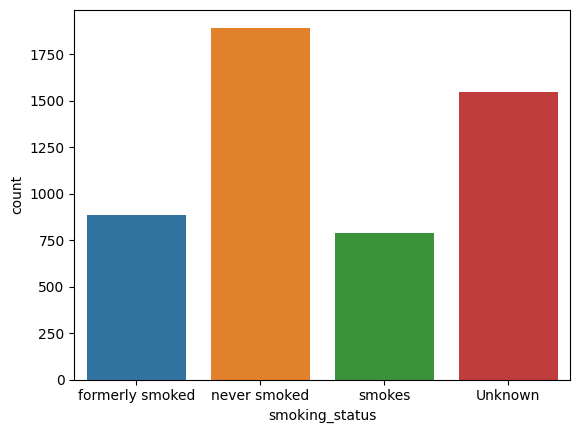

In [18]:
#Charts
sns.countplot(x='smoking_status', data=df)


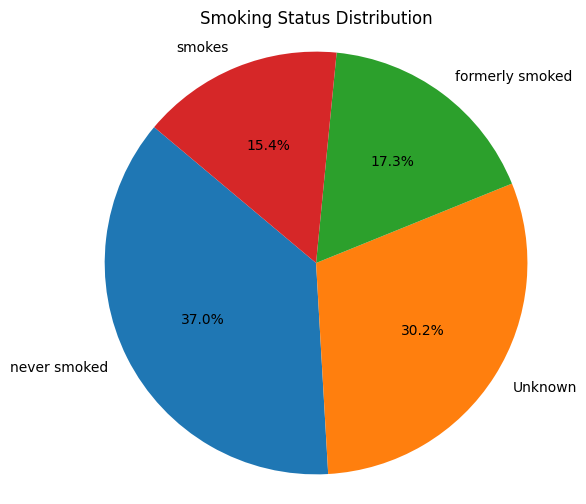

In [19]:
data = {
    'smoking_status': ['formerly smoked','never smoked','smokes','Unknown'],
}
smoking_counts = df['smoking_status'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140)

plt.title("Smoking Status Distribution")

plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

From Scatter plot we can see that there is no relationship between age and bmi  

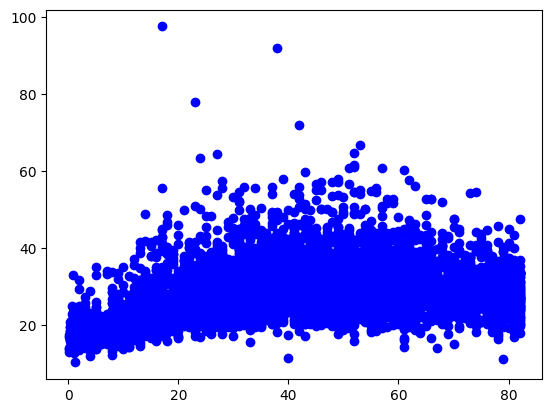

In [20]:
plt.scatter(df['age'], df['bmi'], c ="blue")

In [21]:
# Check if “BMI” column has null values? what is the percentage of null values ? use data engineering method to fill the null values.

print("Null values in bmi:",df['bmi'].isnull().sum())
print("Percentage of null values in bmi:",df['bmi'].isnull().sum()*100/len(df))

# Replace null values in bmi with mean value of bmi
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

Null values in bmi: 201
Percentage of null values in bmi: 3.9334637964774952


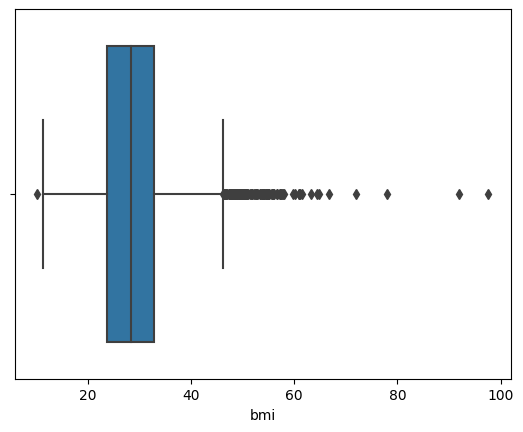

In [22]:
# Remove outliers in bmi
sns.boxplot(x=df['bmi'])

dfw = df['bmi']
dfw_q1 = dfw.quantile(0.25)
dfw_q3 = dfw.quantile(0.75)
dfw_IQR = dfw_q3-dfw_q1
dfw_lowerend = dfw_q1 - (1.5*dfw_IQR)
dfw_upperend = dfw_q3 +(1.5*dfw_IQR)

In [23]:
dfw_outliers = dfw[(dfw<dfw_lowerend) | (dfw>dfw_upperend)]
dfw_outliers

21      48.9
66      47.5
113     56.6
254     50.1
258     54.6
        ... 
4906    54.1
4952    56.6
5009    49.5
5057    47.6
5103    46.9
Name: bmi, Length: 126, dtype: float64

In [24]:
upper = np.where(df['bmi']>=dfw_upperend)[0]
lower = np.where(df['bmi']<=dfw_lowerend)[0]
df.drop(index=upper,inplace=True)
df.drop(index=lower,inplace=True)

<Axes: xlabel='bmi'>

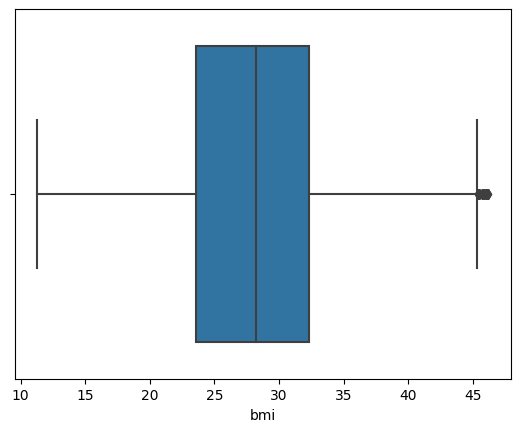

In [25]:
sns.boxplot(x=df['bmi'])

In [26]:
# Remove outlier in avg glucose level

dfg = df['avg_glucose_level']
dfg_q1 = dfg.quantile(0.25)
dfg_q3 = dfg.quantile(0.75)
dfg_IQR = dfg_q3-dfg_q1
dfg_lowerend = dfg_q1 - (1.5*dfg_IQR)
dfg_upperend = dfg_q3 +(1.5*dfg_IQR)

dfg_outliers = dfg[(dfg<dfg_lowerend) | (dfg>dfg_upperend)]
upperg = np.where(df['avg_glucose_level']>=dfg_upperend)[0]
lowerg = np.where(df['avg_glucose_level']<=dfg_lowerend)[0]

df.reset_index(drop=True, inplace=True)  # Reset index to default integer-based index

df = df.drop(df.index[upperg])
df = df.drop(df.index[lowerg])

In [27]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_category,age_group
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,obese,elderly
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,overweight,elderly
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,normal weight,elderly
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,NaN,middle-aged
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,normal weight,elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,NaN,elderly
4980,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,obese,elderly
4981,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,obese,middle-aged
4982,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,overweight,middle-aged


In [28]:
df.reset_index(drop=True, inplace=True)

In [29]:
# Scaling
numerical_columns = ['age', 'bmi', 'avg_glucose_level']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [30]:
# Encoding
df['ever_married'].replace("Yes",1,inplace=True)
df['ever_married'].replace("No",2,inplace=True)

df['smoking_status'].replace("never smoked",1,inplace=True)
df['smoking_status'].replace("smokes",2,inplace=True)
df['smoking_status'].replace("formerly smoked",3,inplace=True)
df['smoking_status'].replace("Unknown",4,inplace=True)

df['Residence_type'].replace("Urban",1,inplace=True)
df['Residence_type'].replace("Rural",2,inplace=True)

df['gender'].replace("Male",1,inplace=True)
df['gender'].replace("Female",2,inplace=True)

df['work_type'].replace("Private",1,inplace=True)
df['work_type'].replace("Self-employed",2,inplace=True)
df['work_type'].replace("Govt_job",3,inplace=True)
df['work_type'].replace("children",4,inplace=True)
df['work_type'].replace("Never_worked",5,inplace=True)

In [31]:
# Getting output for next notebook

output_file_path = 'modified.csv'
df.to_csv(output_file_path, index=False)

# If 'index=False' is specified, it will not save the index column in the CSV file.
